In [2]:
getwd()

[1] "C:/Users/Jyoti"

In [5]:
setwd('C:/R developments')
getwd()
list.files()

[1] "C:/R developments"

[1] "pseudo_facebook.tsv"

In [7]:
pf <- read.csv('pseudo_facebook.tsv', sep = '\t')

In [8]:
names(pf)

[1] "userid"                "age"                   "dob_day"              
 [4] "dob_year"              "dob_month"             "gender"               
 [7] "tenure"                "friend_count"          "friendships_initiated"
[10] "likes"                 "likes_received"        "mobile_likes"         
[13] "mobile_likes_received" "www_likes"             "www_likes_received"

In [10]:
library(ggplot2)

## One Variable

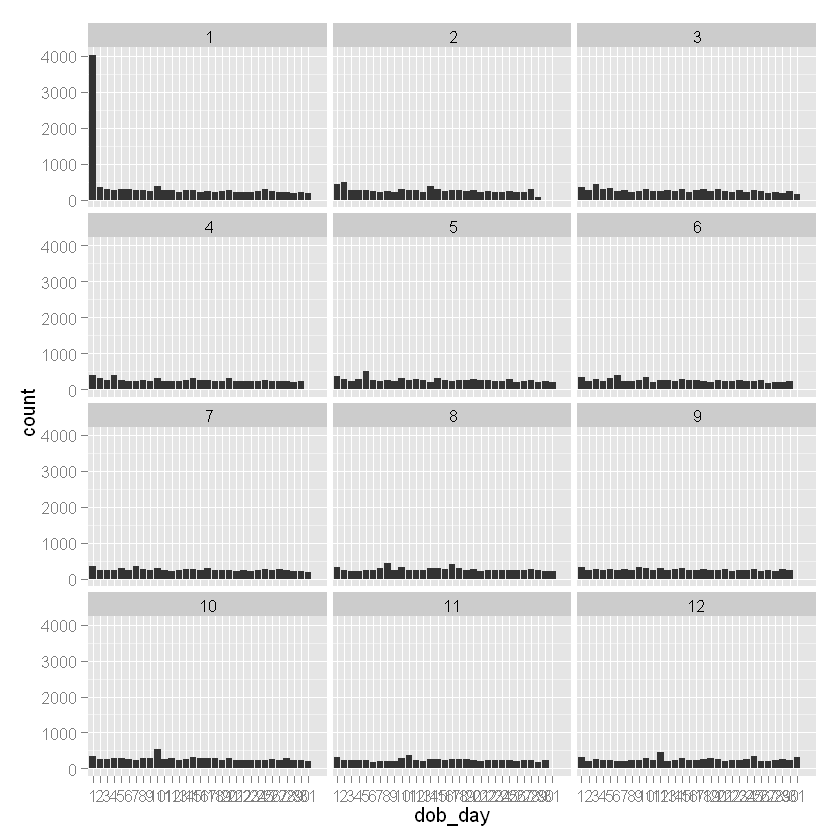

In [13]:
qplot(x=dob_day, data = pf) +
  scale_x_discrete(breaks = 1:31) +
  facet_wrap(~dob_month, ncol = 3)


stat_bin: binwidth defaulted to range/30. Use 'binwidth = x' to adjust this.


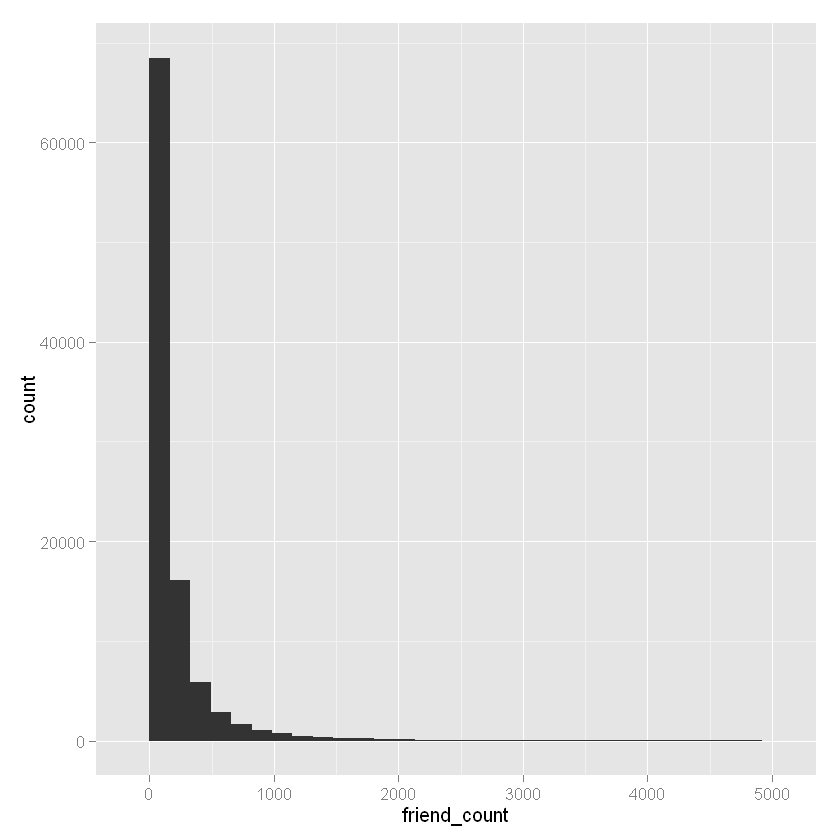

In [14]:
qplot(friend_count, data = pf)

stat_bin: binwidth defaulted to range/30. Use 'binwidth = x' to adjust this.


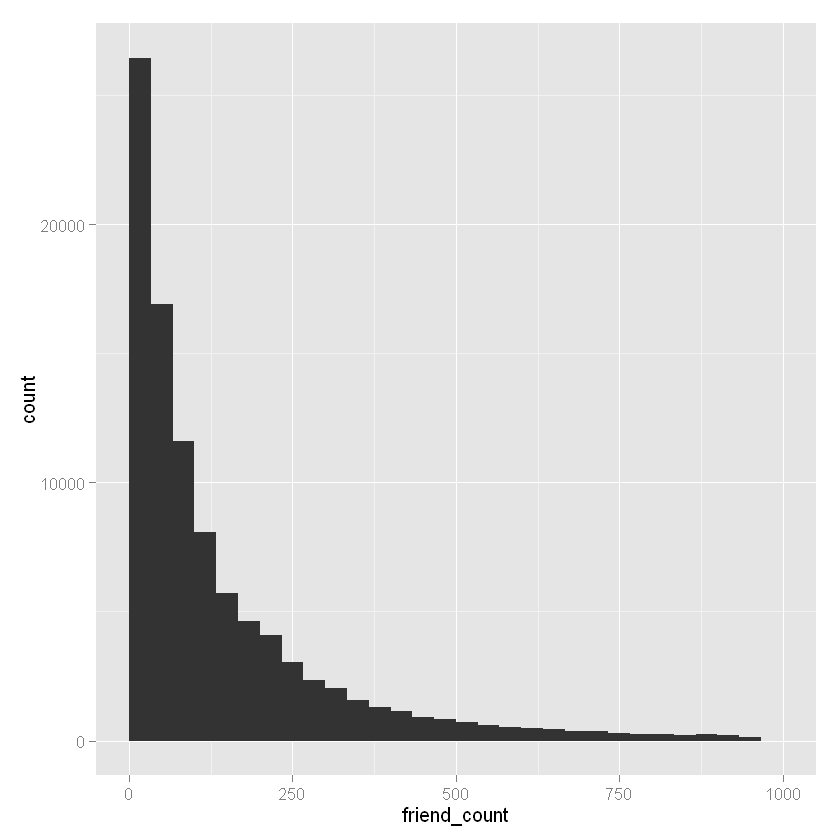

In [15]:
# Let us avoid t lng tail by using limits through scale_x_continuous
qplot(x = friend_count, data = pf)   +
   scale_x_continuous(limits = c(0, 1000))

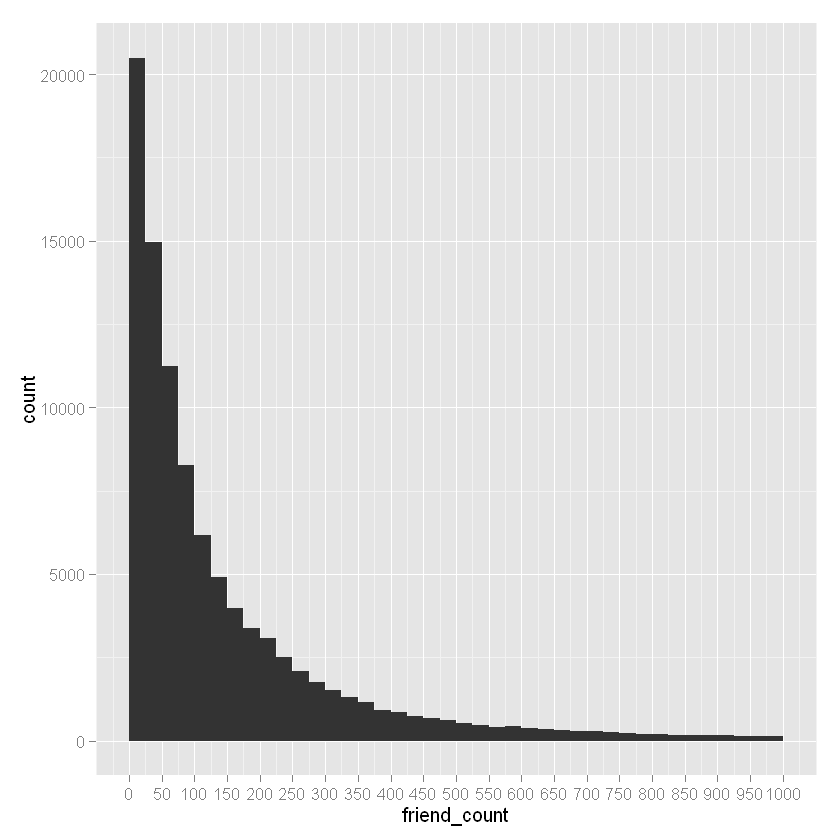

In [17]:
qplot(friend_count,data = pf , binwidth = 25) +
  scale_x_continuous(limits = c(0,1000), breaks = seq(0,1000,50))

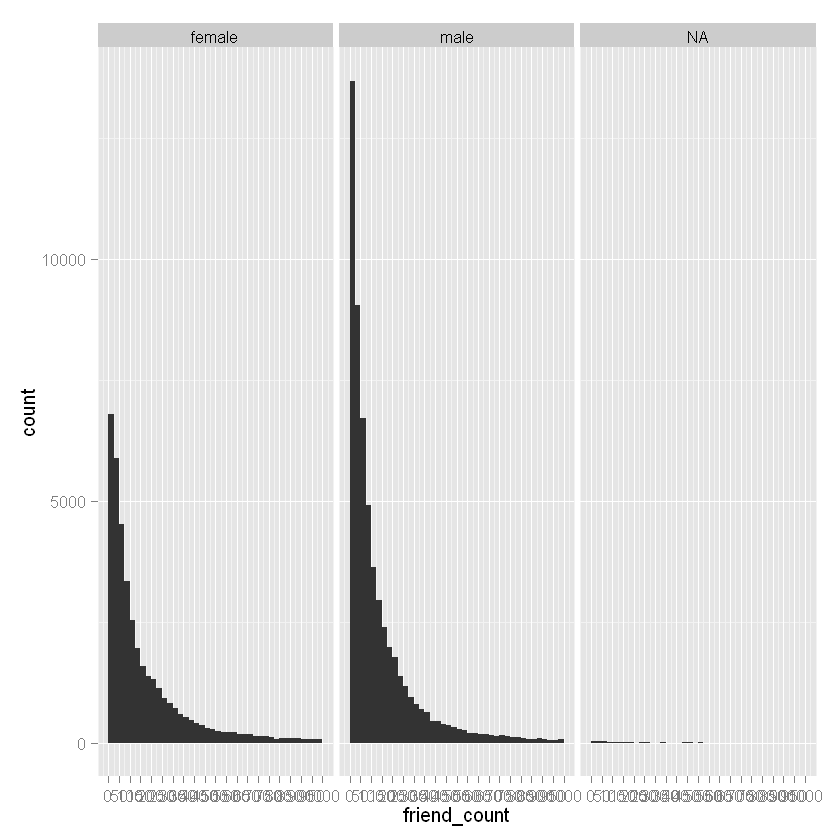

In [18]:
qplot(friend_count,data = pf , binwidth = 25) +
  scale_x_continuous(limits = c(0,1000), breaks = seq(0,1000,50)) +
  facet_wrap(~gender,ncol = 3)

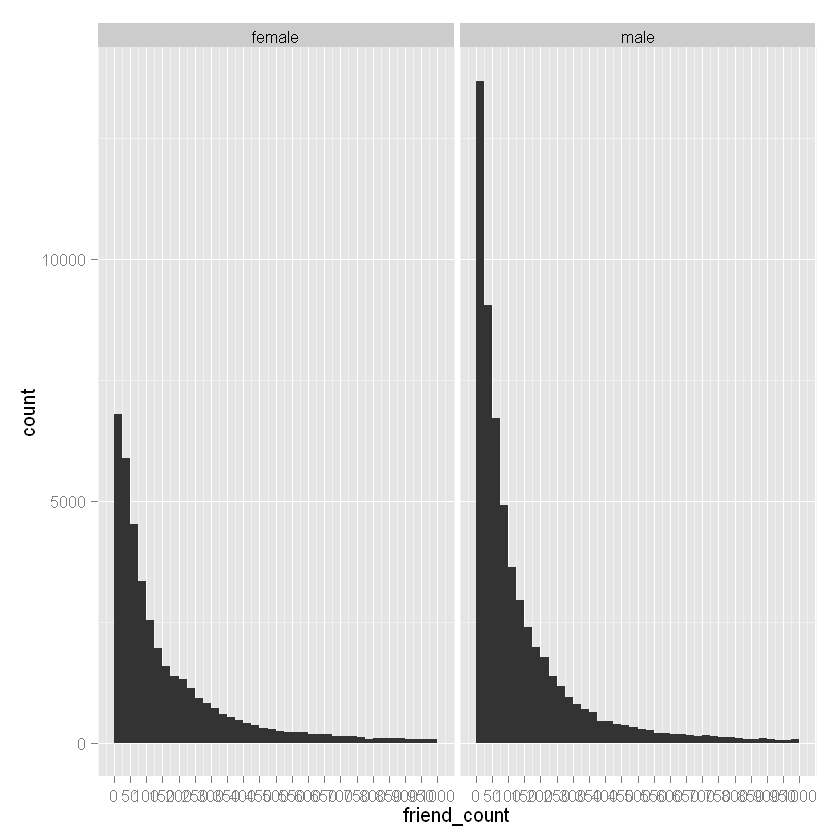

In [19]:
qplot(friend_count,data = na.omit(pf) , binwidth = 25) +
  scale_x_continuous(limits = c(0,1000), breaks = seq(0,1000,50)) +
  facet_wrap(~gender,ncol = 3)

In [20]:
table(pf$gender)
by(pf$friend_count, pf$gender, summary)


female   male 
 40254  58574 

pf$gender: female
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0      37      96     242     244    4923 
------------------------------------------------------------ 
pf$gender: male
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0      27      74     165     182    4917 

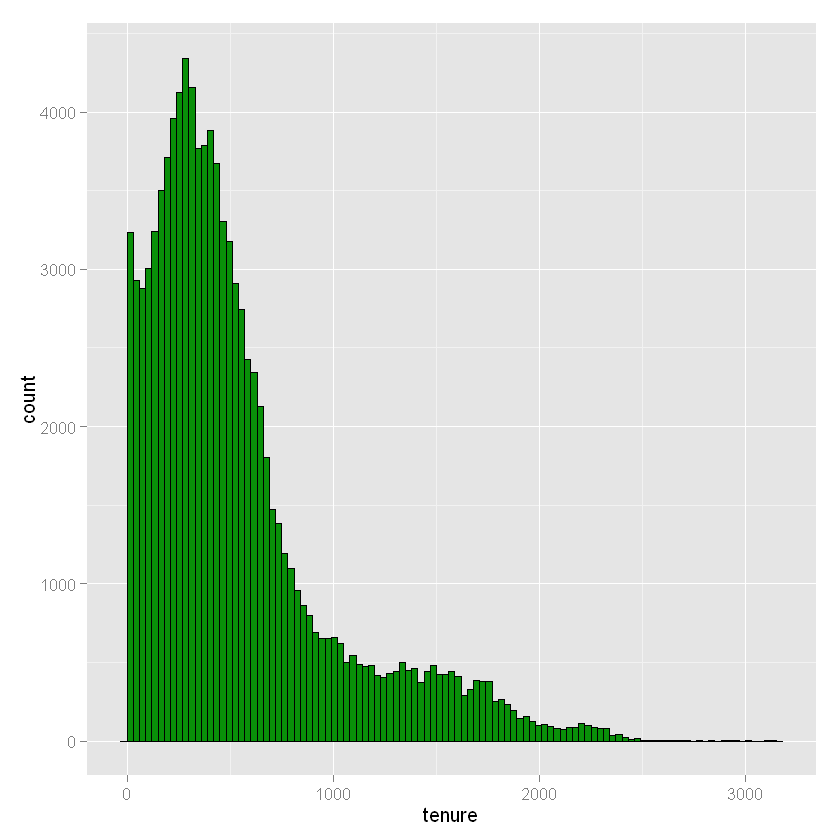

In [21]:
qplot(x = tenure, data = pf, binwidth = 30,
     color = I('black'), fill = I('#099009'))

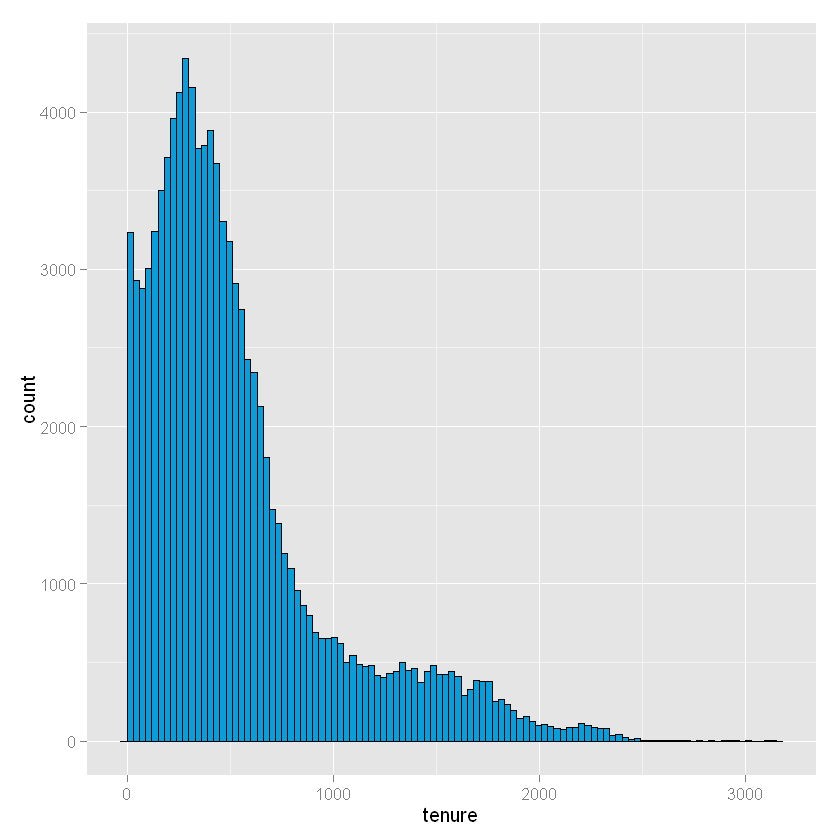

In [22]:
ggplot(aes(x = tenure), data = pf) +
  geom_histogram(binwidth = 30, color = 'black', fill = '#099DD9')

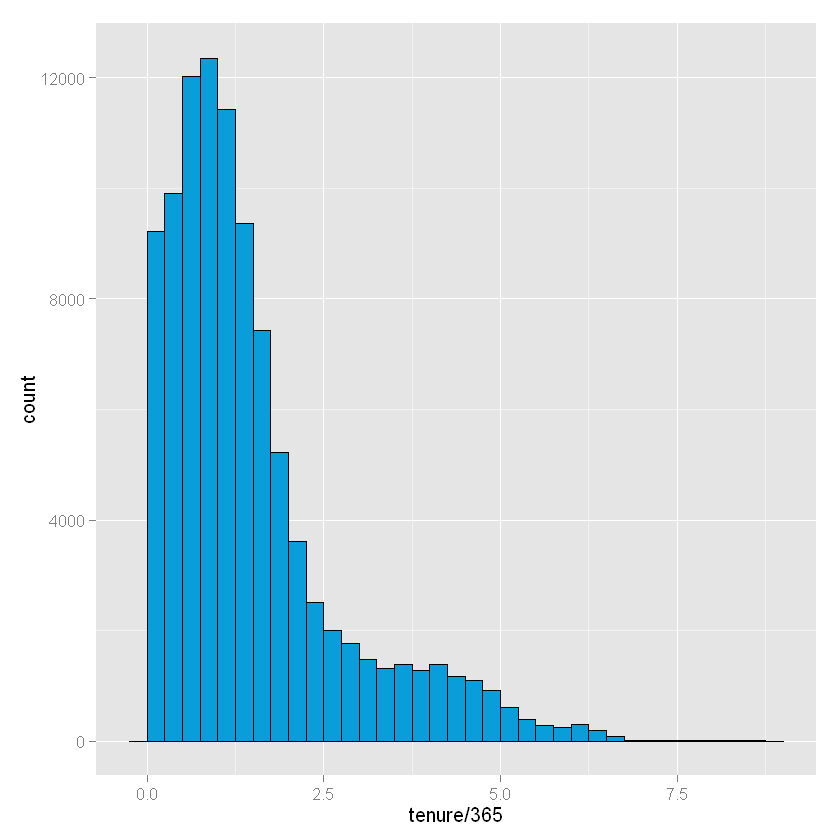

In [23]:
ggplot(aes(x = tenure/365), data = pf) +
  geom_histogram(binwidth = .25, color = 'black', fill = '#099DD9')

stat_bin: binwidth defaulted to range/30. Use 'binwidth = x' to adjust this.


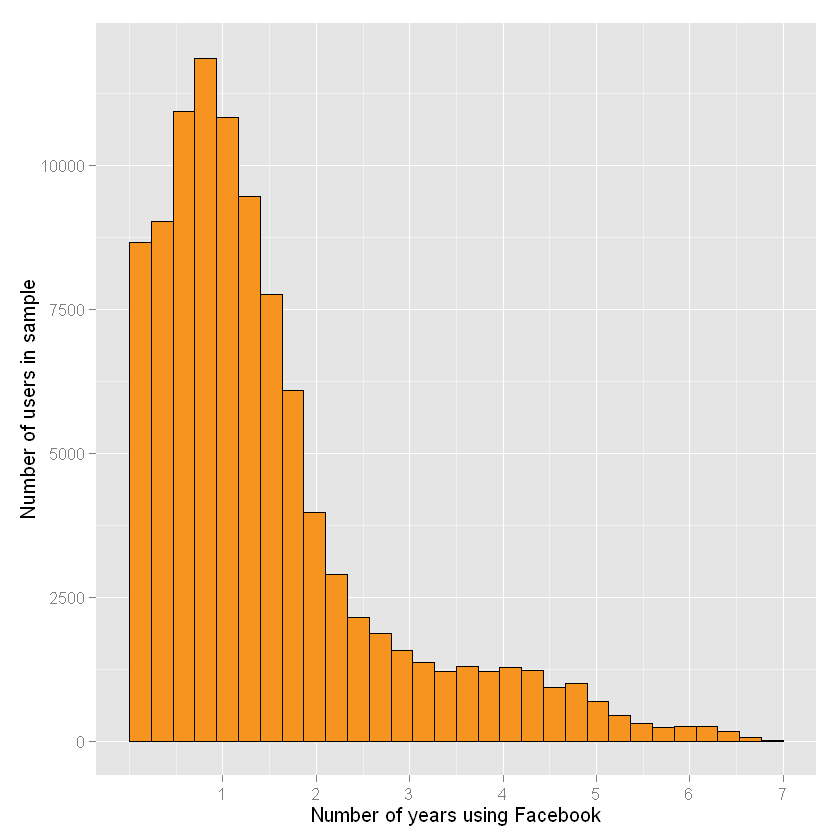

In [24]:
qplot(x = tenure/365,data = pf,
     xlab = 'Number of years using Facebook',
     ylab = 'Number of users in sample',
     color = I('black'), fill = I('#F79420')) +
   scale_x_continuous(breaks = seq(1,7,1), lim = c(0,7))

In [30]:
install.packages("gridExtra", repos="http://cran.us.r-project.org", dependencies=TRUE)


also installing the dependencies 'memoise', 'crayon', 'praise', 'testthat'



package 'memoise' successfully unpacked and MD5 sums checked
package 'crayon' successfully unpacked and MD5 sums checked
package 'praise' successfully unpacked and MD5 sums checked
package 'testthat' successfully unpacked and MD5 sums checked
package 'gridExtra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Jyoti\AppData\Local\Temp\RtmpEfinwV\downloaded_packages


In [31]:
library(gridExtra)

stat_bin: binwidth defaulted to range/30. Use 'binwidth = x' to adjust this.
stat_bin: binwidth defaulted to range/30. Use 'binwidth = x' to adjust this.
stat_bin: binwidth defaulted to range/30. Use 'binwidth = x' to adjust this.


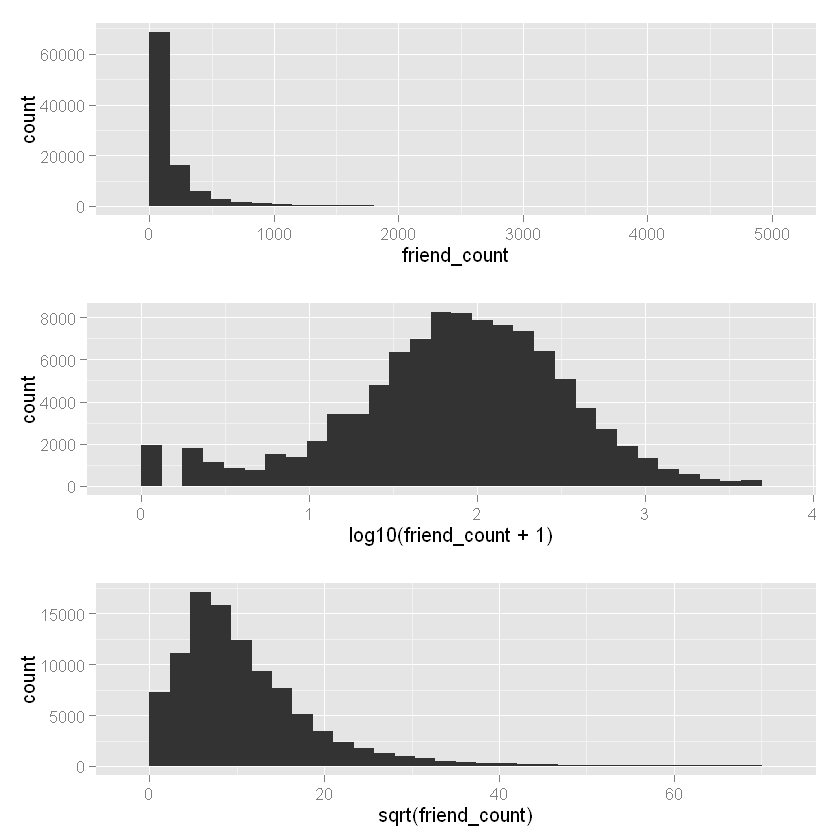

In [32]:
p1 <- qplot(x = friend_count, data = pf)
p2 <- qplot(x = log10(friend_count + 1), data = pf)
p3 <- qplot(x = sqrt(friend_count), data = pf)

grid.arrange(p1,p2,p3, ncol = 1)

In [33]:
p1 <- ggplot(aes(x = friend_count), data = pf) + geom_histogram()
p2 <- p1 + scale_x_log10()
p3 <- p1 + scale_x_sqrt()

stat_bin: binwidth defaulted to range/30. Use 'binwidth = x' to adjust this.
stat_bin: binwidth defaulted to range/30. Use 'binwidth = x' to adjust this.
stat_bin: binwidth defaulted to range/30. Use 'binwidth = x' to adjust this.


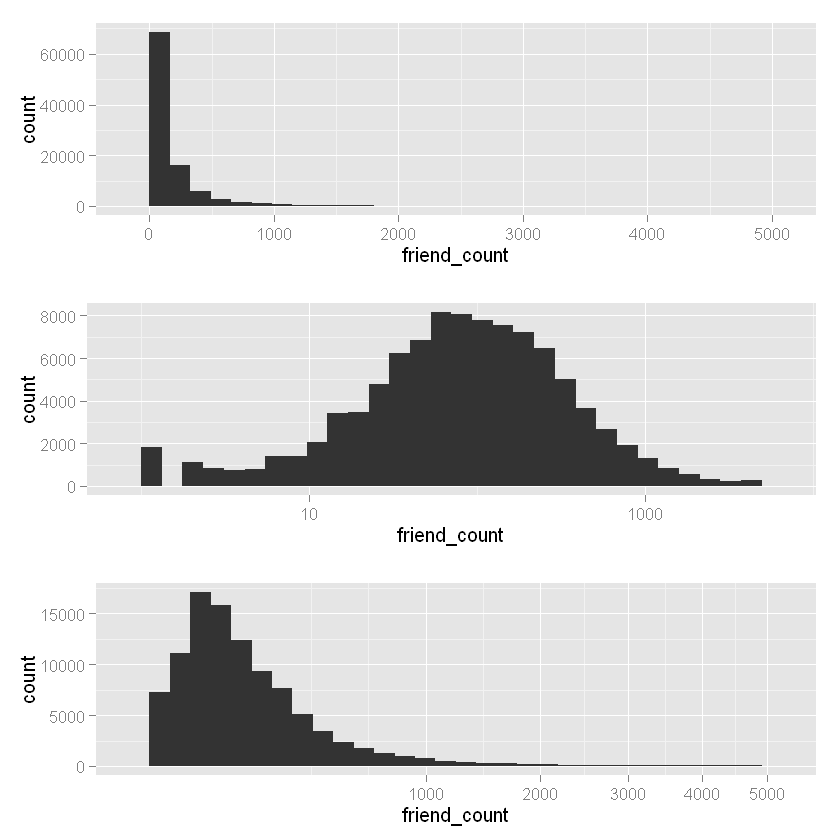

In [34]:
grid.arrange(p1,p2,p3, ncol = 1)

Warning message:
: Removed 2 rows containing missing values (geom_path).Warning message:
: Removed 2 rows containing missing values (geom_path).

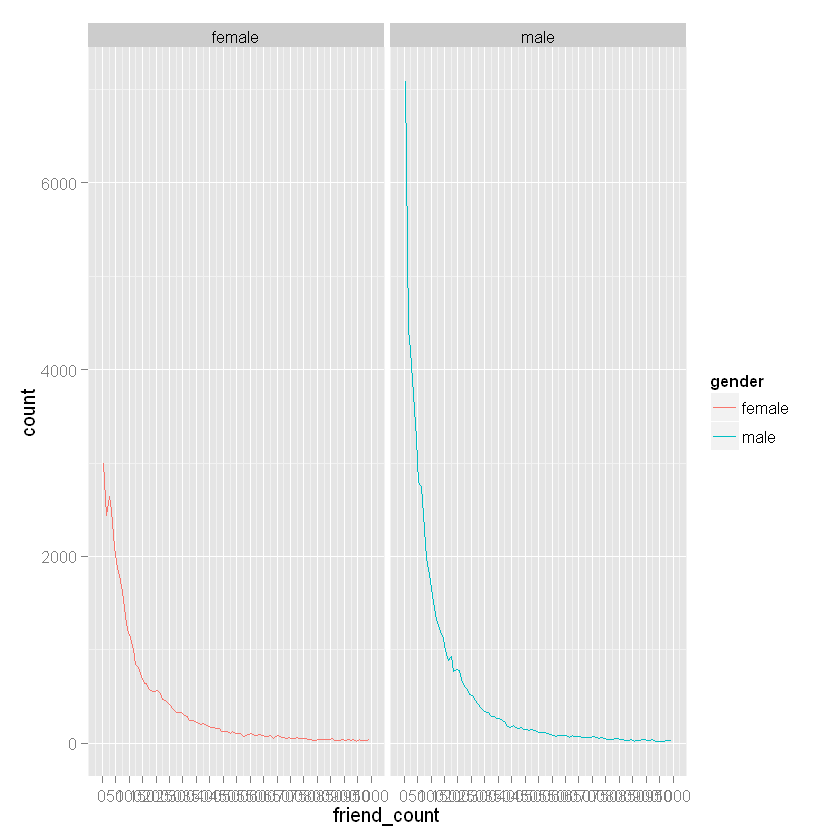

In [36]:
qplot(x = friend_count, data = subset(pf, !is.na(gender)),
     binwidth = 10, geom = 'freqpoly', color = gender) +
   scale_x_continuous(lim = c(0,1000), breaks = seq(0,1000,50)) +
   facet_wrap(~gender)

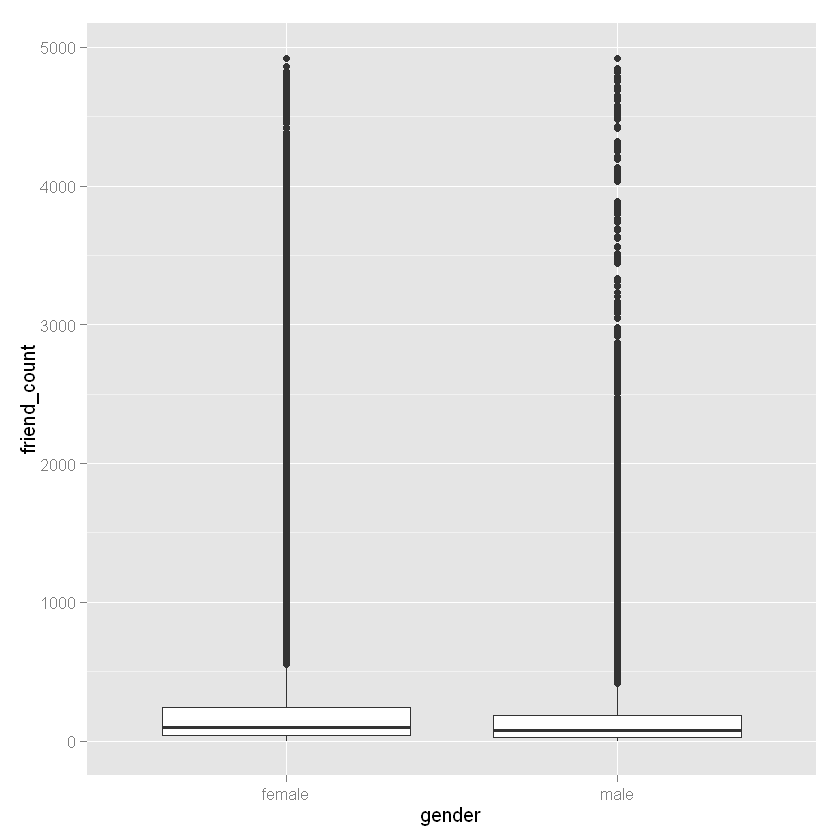

In [40]:
qplot(x = gender, y = friend_count ,
     data = subset(pf, !is.na(gender)),
     geom = 'boxplot')